In [57]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.metrics import confusion_matrix, mean_squared_error
import pandas as pd

In [58]:
#data pull
raw_creditg = fetch_openml(name="credit-g")
raw_trans = fetch_openml(name="blood-transfusion-service-center") 
raw_steel= fetch_openml(name="steel-plates-fault")
raw_diabetes= fetch_openml(name="diabetes")

d:\aml\venv\lib\site-packages\sklearn\datasets\_openml.py:311: UserWarning: Multiple active versions of the dataset matching the name credit-g exist. Versions may be fundamentally different, returning version 1.
  warn(
d:\aml\venv\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
d:\aml\venv\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the 

In [59]:
df_creditg = pd.DataFrame(raw_creditg.data, columns=raw_creditg.feature_names)
df_creditg_y = pd.DataFrame(raw_creditg.target, columns=raw_creditg.target_names)

df_trans = pd.DataFrame(raw_trans.data, columns=raw_trans.feature_names)
df_trans_y = pd.DataFrame(raw_trans.target, columns=raw_trans.target_names)

df_steel = pd.DataFrame(raw_steel.data, columns=raw_steel.feature_names)
df_steel_y = pd.DataFrame(raw_steel.target, columns=raw_steel.target_names)

df_diabetes = pd.DataFrame(raw_diabetes.data, columns=raw_diabetes.feature_names)
df_diabetes_y = pd.DataFrame(raw_diabetes.target, columns=raw_diabetes.target_names)

df_trans_y, df_steel_y, df_diabetes_y, df_creditg_y

(    Class
 0       2
 1       2
 2       2
 3       2
 4       1
 ..    ...
 743     1
 744     1
 745     1
 746     1
 747     1
 
 [748 rows x 1 columns],
      Class
 0        1
 1        1
 2        1
 3        1
 4        1
 ...    ...
 1936     2
 1937     2
 1938     2
 1939     2
 1940     2
 
 [1941 rows x 1 columns],
                class
 0    tested_positive
 1    tested_negative
 2    tested_positive
 3    tested_negative
 4    tested_positive
 ..               ...
 763  tested_negative
 764  tested_negative
 765  tested_negative
 766  tested_positive
 767  tested_negative
 
 [768 rows x 1 columns],
     class
 0    good
 1     bad
 2    good
 3    good
 4     bad
 ..    ...
 995  good
 996  good
 997  good
 998   bad
 999  good
 
 [1000 rows x 1 columns])

In [60]:
X_train_creditg, X_test_creditg, y_train_creditg, y_test_creditg = train_test_split(df_creditg, df_creditg_y, test_size=0.2, stratify=df_creditg_y)
X_train_trans, X_test_trans, y_train_trans, y_test_trans = train_test_split(df_trans, df_trans_y, test_size=0.2, stratify=df_trans_y)
X_train_steel, X_test_steel, y_train_steel, y_test_steel = train_test_split(df_steel, df_steel_y, test_size=0.2, stratify=df_steel_y)
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(df_diabetes, df_diabetes_y, test_size=0.2, stratify=df_diabetes_y)

X_train_creditg, X_train_diabetes, X_train_steel, X_train_trans

(    checking_status  duration                  credit_history  \
 777              <0      18.0                   existing paid   
 175     no checking      30.0                        all paid   
 112        0<=X<200      18.0                   existing paid   
 972              <0      24.0                        all paid   
 981     no checking      48.0                   existing paid   
 ..              ...       ...                             ...   
 998              <0      45.0                   existing paid   
 6       no checking      24.0                   existing paid   
 252        0<=X<200      30.0                   existing paid   
 744              <0      39.0  critical/other existing credit   
 440     no checking      12.0                   existing paid   
 
                  purpose  credit_amount    savings_status  employment  \
 777             radio/tv         3509.0              <100      4<=X<7   
 175             used car         7485.0  no known savings

In [61]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale',MinMaxScaler())
    ])
cat_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot',OneHotEncoder(handle_unknown='ignore', sparse=False))
])

In [62]:
#creditg
numeric_features_creditg = [
    "duration",
    "credit_amount",
    "installment_commitment",
    "residence_since",
    "age",
    "existing_credits",
    "num_dependents"
]
categorical_features_creditg = [
    "checking_status",
    "credit_history",
    "purpose",
    "savings_status",
    "employment",
    "personal_status",
    "other_parties",
    "property_magnitude",
    "other_payment_plans",
    "housing",
    "job",
    "own_telephone",
    "foreign_worker"
]

In [63]:
#df_diabetes
numeric_features_diabetes = [
    "preg",
    "plas",
    "pres",
    "skin",
    "insu",
    "mass",
    "pedi",
    "age"
]

In [64]:
#df_steel
numeric_features_steel = [
    "V1",
    "V2",
    "V3",
    "V4",
    "V5",
    "V6",
    "V7",
    "V8",
    "V9",
    "V10",
    "V11",
    "V12",
    "V13",
    "V14",
    "V15",
    "V16",
    "V17",
    "V18",
    "V19",
    "V20",
    "V21",
    "V22",
    "V23",
    "V24",
    "V25",
    "V26",
    "V27",
    "V28",
    "V29",
    "V30",
    "V31",
    "V32",
    "V33"
]

In [65]:
#df_trans
numeric_features_trans = ["V1", "V2", "V3", "V4"]

In [66]:
from sklearn.compose import ColumnTransformer

col_trans_creditg = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline, numeric_features_creditg),
    ('cat_pipeline',cat_pipeline, categorical_features_creditg)
    ],
    remainder='drop',
    n_jobs=-1)

col_trans_diabetes = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline,numeric_features_diabetes),
    ],
    remainder='drop',
    n_jobs=-1)

col_trans_steel = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline, numeric_features_steel),
    ],
    remainder='drop',
    n_jobs=-1)

col_trans_trans = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline, numeric_features_trans),
    ],
    remainder='drop',
    n_jobs=-1)

In [67]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier()

clf_pipeline_creditg = Pipeline(steps=[
    ('col_trans', col_trans_creditg),
    ('model', clf_knn)
])

clf_pipeline_diabetes = Pipeline(steps=[
    ('col_trans', col_trans_diabetes),
    ('model', clf_knn)
])

clf_pipeline_trans = Pipeline(steps=[
    ('col_trans', col_trans_trans),
    ('model', clf_knn)
])

clf_pipeline_steel = Pipeline(steps=[
    ('col_trans', col_trans_steel),
    ('model', clf_knn)
])

In [68]:
clf_pipeline_creditg.get_params()

{'memory': None,
 'steps': [('col_trans', ColumnTransformer(n_jobs=-1,
                     transformers=[('num_pipeline',
                                    Pipeline(steps=[('impute', SimpleImputer()),
                                                    ('scale', MinMaxScaler())]),
                                    ['duration', 'credit_amount',
                                     'installment_commitment', 'residence_since',
                                     'age', 'existing_credits',
                                     'num_dependents']),
                                   ('cat_pipeline',
                                    Pipeline(steps=[('impute',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('one-hot',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False)

In [69]:
from scipy.stats import randint
model_parameters = {"model__algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute'], 
                    "model__leaf_size": randint(low=20, high=40),
                    "model__weights": ['uniform', 'distance'],
                    "model__n_neighbors": randint(low=3, high=15),
                    }

In [70]:
from sklearn.model_selection import RandomizedSearchCV

random_search_creditg = RandomizedSearchCV(
    random_state=10,
    estimator=clf_pipeline_creditg,
    param_distributions=model_parameters,
    n_iter=40,   
    n_jobs=2,
    verbose=1,
    return_train_score=True
)

random_search_diabetes = RandomizedSearchCV(
    random_state=10,
    estimator=clf_pipeline_diabetes,
    param_distributions=model_parameters,
    n_iter=40,   
    n_jobs=2,
    verbose=1,
    return_train_score=True
)

random_search_steel = RandomizedSearchCV(
    random_state=10,
    estimator=clf_pipeline_steel,
    param_distributions=model_parameters,
    n_iter=40,   
    n_jobs=2,
    verbose=1,
    return_train_score=True
)

random_search_trans = RandomizedSearchCV(
    random_state=10,
    estimator=clf_pipeline_trans,
    param_distributions=model_parameters,
    n_iter=40,   
    n_jobs=2,
    verbose=1,
    return_train_score=True
)

In [71]:
random_search_creditg.fit(X_train_creditg, y_train_creditg)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


RandomizedSearchCV(estimator=Pipeline(steps=[('col_trans',
                                              ColumnTransformer(n_jobs=-1,
                                                                transformers=[('num_pipeline',
                                                                               Pipeline(steps=[('impute',
                                                                                                SimpleImputer()),
                                                                                               ('scale',
                                                                                                MinMaxScaler())]),
                                                                               ['duration',
                                                                                'credit_amount',
                                                                                'installment_commitment',
                                                                                'residence_since',
                                                                                'age',
                                                                                'existing_credits',
                                                                                'num_dependents']),
                                                                              ('cat_pipeline',
                                                                               Pipeline(steps=[('impute',
                                                                                                SimpleI...
                   param_distributions={'model__algorithm': ['auto',
                                                             'ball_tree',
                                                             'kd_tree',
                                                             'brute'],
                                        'model__leaf_size': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A95E123550>,
                                        'model__n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A95A5546D0>,
                                        'model__weights': ['uniform',
                                                           'distance']},
                   random_state=10, return_train_score=True, verbose=1)

In [72]:
random_search_creditg.cv_results_

{'mean_fit_time': array([0.03670526, 0.03019366, 0.02490106, 0.02460017, 0.02450142,
        0.02399998, 0.02749944, 0.03712506, 0.03688483, 0.03626518,
        0.03108182, 0.02879372, 0.0376698 , 0.03551445, 0.02920957,
        0.03168068, 0.03248625, 0.02815032, 0.02470016, 0.02449965,
        0.02429972, 0.03548007, 0.03569517, 0.02628717, 0.03069949,
        0.02750635, 0.03763943, 0.03649917, 0.02859993, 0.02510056,
        0.02510061, 0.02839766, 0.02950635, 0.0287848 , 0.03150635,
        0.02659993, 0.02460103, 0.03009233, 0.03009391, 0.02650046]),
 'std_fit_time': array([0.00548244, 0.00463176, 0.00058289, 0.00079985, 0.000632  ,
        0.00114095, 0.00482786, 0.00108375, 0.00135552, 0.00320045,
        0.00085258, 0.00574852, 0.00113295, 0.00350397, 0.00443627,
        0.0052189 , 0.00551027, 0.00483614, 0.00112249, 0.00200032,
        0.00092682, 0.00424523, 0.00256559, 0.00131946, 0.00643153,
        0.0050392 , 0.0015281 , 0.00070716, 0.00473714, 0.00096917,
        0.001

In [73]:
print("Best Score of train set: "+str(random_search_creditg.best_score_))
print("Best parameter set: "+str(random_search_creditg.best_params_))
print("Test Score: "+str(random_search_creditg.score(X_test_creditg,y_test_creditg)))

Best Score of train set: 0.745
Best parameter set: {'model__algorithm': 'ball_tree', 'model__leaf_size': 33, 'model__n_neighbors': 6, 'model__weights': 'distance'}
Test Score: 0.745


Text(0.5, 1.0, 'ROC Curve - KNeighborsClassifier - credit-g')

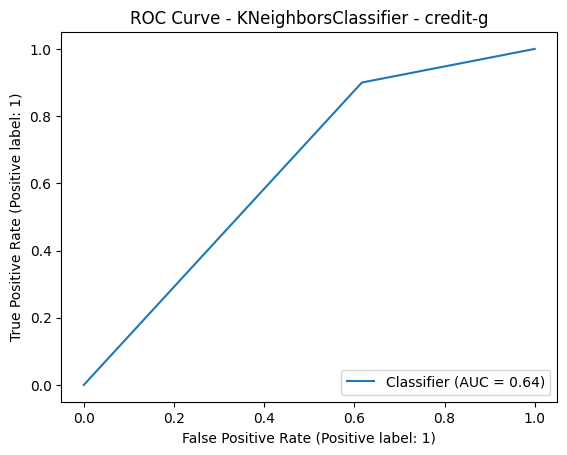

In [74]:
from sklearn.metrics import roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt
pred_y_test_creditg = random_search_creditg.predict(X_test_creditg)
y_test_creditg_numeric = y_test_creditg['class'].map({'good': 1, 'bad': 0})
pred_y_test_creditg = pd.Series(pred_y_test_creditg)
pred_y_test_creditg = pred_y_test_creditg.map({'good': 1, 'bad': 0})
RocCurveDisplay.from_predictions(y_test_creditg_numeric, pred_y_test_creditg)
plt.title('ROC Curve - KNeighborsClassifier - credit-g')

In [75]:
import numpy as np
scores_creditg = random_search_creditg.cv_results_["mean_test_score"]
best_score_index_creditg = np.where(scores_creditg == random_search_creditg.best_score_)
number_of_iterations_creditg = best_score_index_creditg[0]
print(number_of_iterations_creditg)

[ 8 29 35 37]


In [76]:
random_search_diabetes.fit(X_train_diabetes, y_train_diabetes)
random_search_diabetes.cv_results_
print("Best Score of train set: "+str(random_search_diabetes.best_score_))
print("Best parameter set: "+str(random_search_diabetes.best_params_))
print("Test Score: "+str(random_search_diabetes.score(X_test_diabetes,y_test_diabetes)))

Fitting 5 folds for each of 40 candidates, totalling 200 fits


d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Best Score of train set: 0.7394109023057445
Best parameter set: {'model__algorithm': 'auto', 'model__leaf_size': 29, 'model__n_neighbors': 3, 'model__weights': 'uniform'}
Test Score: 0.7337662337662337


Text(0.5, 1.0, 'ROC Curve - KNeighborsClassifier - diabetes')

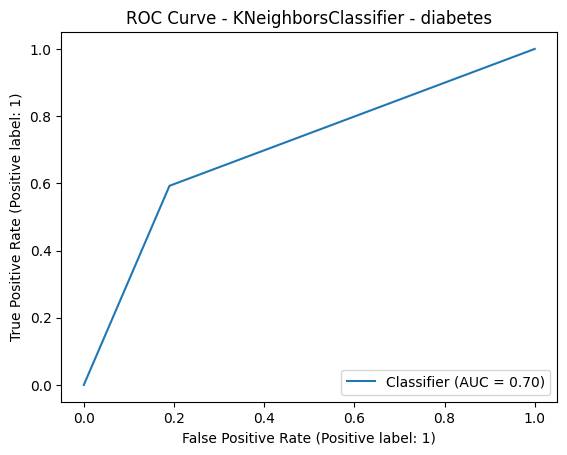

In [77]:
pred_y_test_diabetes = random_search_diabetes.predict(X_test_diabetes)
y_test_diabetes_numeric = y_test_diabetes['class'].map({'tested_negative': 0, 'tested_positive': 1})
pred_y_test_diabetes = pd.Series(pred_y_test_diabetes)
pred_y_test_diabetes = pred_y_test_diabetes.map({'tested_negative': 0, 'tested_positive': 1})
RocCurveDisplay.from_predictions(y_test_diabetes_numeric, pred_y_test_diabetes)
plt.title('ROC Curve - KNeighborsClassifier - diabetes')

In [78]:
import numpy as np
scores_diabetes = random_search_diabetes.cv_results_["mean_test_score"]
best_score_index_diabetes = np.where(scores_diabetes == random_search_diabetes.best_score_)
number_of_iterations_diabetes = best_score_index_diabetes[0]
print(number_of_iterations_diabetes)

[ 2 22 31]


In [79]:
random_search_steel.fit(X_train_steel, y_train_steel)
random_search_steel.cv_results_
print("Best Score of train set: "+str(random_search_steel.best_score_))
print("Best parameter set: "+str(random_search_steel.best_params_))
print("Test Score: "+str(random_search_steel.score(X_test_steel,y_test_steel)))

Fitting 5 folds for each of 40 candidates, totalling 200 fits


d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Best Score of train set: 0.9961394046260761
Best parameter set: {'model__algorithm': 'ball_tree', 'model__leaf_size': 24, 'model__n_neighbors': 3, 'model__weights': 'distance'}
Test Score: 0.9948586118251928


Text(0.5, 1.0, 'ROC Curve - KNeighborsClassifier - steel-plates-fault')

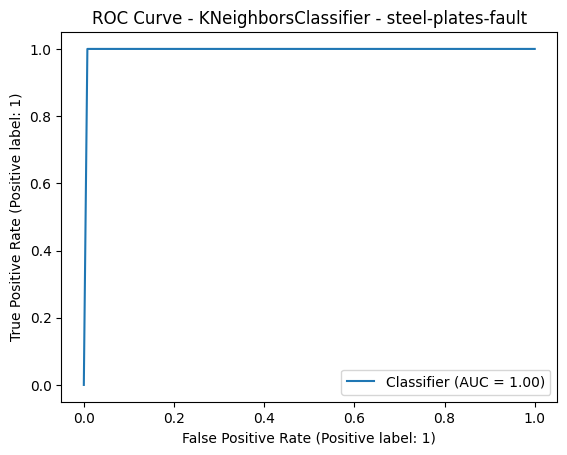

In [80]:
pred_y_test_steel = random_search_steel.predict(X_test_steel)
y_test_steel_numeric = y_test_steel['Class'].map({'1': 0, '2': 1})
pred_y_test_steel = pd.Series(pred_y_test_steel)
pred_y_test_steel = pred_y_test_steel.map({'1': 0, '2': 1})
RocCurveDisplay.from_predictions(y_test_steel_numeric, pred_y_test_steel)
plt.title('ROC Curve - KNeighborsClassifier - steel-plates-fault')

In [81]:
score_steel = random_search_steel.cv_results_["mean_test_score"]
best_score_index_steel = np.where(score_steel == random_search_steel.best_score_)
number_of_iterations_steel = best_score_index_steel[0]
print(number_of_iterations_steel)

[ 0  8 10 29 32 37]


In [82]:
random_search_trans.fit(X_train_trans, y_train_trans)
random_search_trans.cv_results_
print("Best Score of train set: "+str(random_search_trans.best_score_))
print("Best parameter set: "+str(random_search_trans.best_params_))
print("Test Score: "+str(random_search_trans.score(X_test_trans,y_test_trans)))

Fitting 5 folds for each of 40 candidates, totalling 200 fits


d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Best Score of train set: 0.7826750700280112
Best parameter set: {'model__algorithm': 'auto', 'model__leaf_size': 26, 'model__n_neighbors': 9, 'model__weights': 'uniform'}
Test Score: 0.76


Text(0.5, 1.0, 'ROC Curve - KNeighborsClassifier - blood-transfusion-service-center')

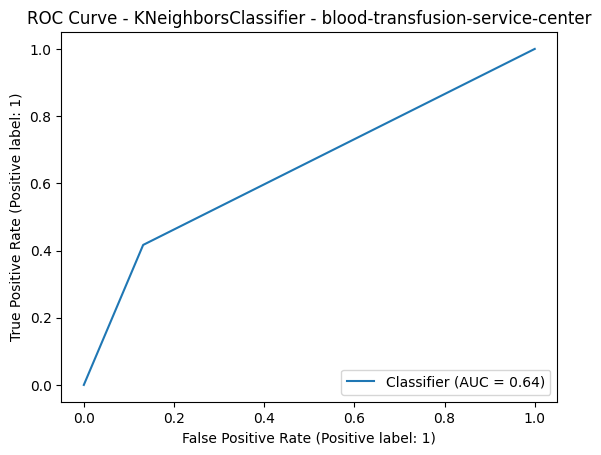

In [83]:
pred_y_test_trans = random_search_trans.predict(X_test_trans)
y_test_trans_numeric = y_test_trans['Class'].map({'1': 0, '2': 1})
pred_y_test_trans = pd.Series(pred_y_test_trans)
pred_y_test_trans = pred_y_test_trans.map({'1': 0, '2': 1})
RocCurveDisplay.from_predictions(y_test_trans_numeric, pred_y_test_trans)
plt.title('ROC Curve - KNeighborsClassifier - blood-transfusion-service-center')

In [84]:
score_trans = random_search_trans.cv_results_["mean_test_score"]
best_score_index_trans = np.where(score_trans == random_search_trans.best_score_)
number_of_iterations_trans = best_score_index_trans[0]
print(number_of_iterations_trans)

[36]


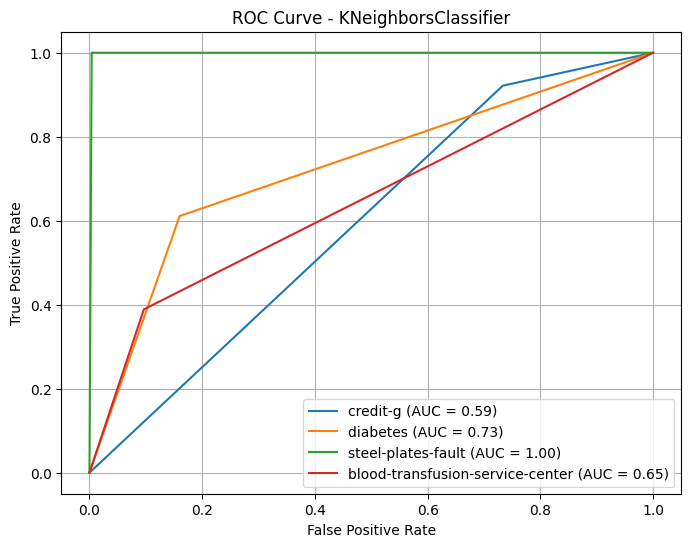

In [93]:
# summary ROC chart
from sklearn.metrics import roc_curve, auc

fpr1, tpr1, _ = roc_curve(y_test_creditg_numeric, pred_y_test_creditg)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test_diabetes_numeric, pred_y_test_diabetes)
roc_auc2 = auc(fpr2, tpr2)

fpr3, tpr3, _ = roc_curve(y_test_steel_numeric, pred_y_test_steel)
roc_auc3 = auc(fpr3, tpr3)

fpr4, tpr4, _ = roc_curve(y_test_trans_numeric, pred_y_test_trans)
roc_auc4 = auc(fpr4, tpr4)

# Plot ROC curves\n",
plt.figure(figsize=(8, 6))

plt.plot(fpr1, tpr1, label=f'credit-g (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, label=f'diabetes (AUC = {roc_auc2:.2f})')
plt.plot(fpr3, tpr3, label=f'steel-plates-fault (AUC = {roc_auc3:.2f})')
plt.plot(fpr4, tpr4, label=f'blood-transfusion-service-center (AUC = {roc_auc4:.2f})')

# Customize the plot\n",
plt.title('ROC Curve - KNeighborsClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)

plt.show()

In [85]:
import numpy as np
params_arr = random_search_creditg.cv_results_["params"]
numbered_params_arr = list(range(len(params_arr)))
mean_test = []
for i in range(len(random_search_creditg.cv_results_["mean_test_score"])):
    mean_test.append(np.mean(
        [
            random_search_creditg.cv_results_["mean_test_score"][i],
            random_search_diabetes.cv_results_["mean_test_score"][i],
            random_search_steel.cv_results_["mean_test_score"][i],
            random_search_trans.cv_results_["mean_test_score"][i]
        ]
    ))

mean_test

scd = dict(zip(numbered_params_arr, mean_test))
scd
crb = -1
crbi = -1
for key, val in scd.items():
    if key > crb:
        crb = key
key, scd[key], params_arr[key], mean_test

(39,
 0.8067789471515645,
 {'model__algorithm': 'auto',
  'model__leaf_size': 33,
  'model__n_neighbors': 14,
  'model__weights': 'distance'},
 [0.7987181431058458,
  0.7890871020611918,
  0.8039904162558611,
  0.8035857415594307,
  0.8013335070128944,
  0.7995121196462416,
  0.7997756376782706,
  0.8082562323383917,
  0.8079839619883767,
  0.8099181173501443,
  0.8010133111730726,
  0.8009133389456675,
  0.8082562323383917,
  0.7995121196462416,
  0.8008236081707152,
  0.8093181222115198,
  0.8100069098685,
  0.8006159738127244,
  0.8038249874761666,
  0.8107549520840378,
  0.8093181222115198,
  0.8082562323383917,
  0.8048272509897547,
  0.8082562323383917,
  0.8068685951365284,
  0.7899169339939649,
  0.8087771476281898,
  0.798319341613581,
  0.8006159738127244,
  0.8079839619883767,
  0.7974860082802476,
  0.8048272509897547,
  0.8022703139741931,
  0.7990954529795748,
  0.7899169339939649,
  0.8074266690024356,
  0.8107584534845981,
  0.8079839619883767,
  0.8073060911326817,
  0

In [86]:
import ConfigSpace as CS
from sklearn.model_selection import cross_val_score
from smac.facade import HyperparameterOptimizationFacade, BlackBoxFacade
from smac.scenario import Scenario
from sklearn.model_selection import GridSearchCV

In [87]:
cs = CS.ConfigurationSpace()

model__algorithm = CS.CategoricalHyperparameter("model__algorithm", choices=['auto', 'ball_tree', 'kd_tree', 'brute'])
model__leaf_size = CS.UniformIntegerHyperparameter("model__leaf_size", 20, 40, default_value=30)
model__weights = CS.CategoricalHyperparameter("model__weights", choices=['uniform', 'distance'])
model__n_neighbors = CS.UniformIntegerHyperparameter("model__n_neighbors", 3, 15, default_value=7)

cs.add_hyperparameters(
        [
            model__algorithm,
            model__leaf_size,
            model__weights,
            model__n_neighbors,
        ]
    )

[model__algorithm, Type: Categorical, Choices: {auto, ball_tree, kd_tree, brute}, Default: auto,
 model__leaf_size, Type: UniformInteger, Range: [20, 40], Default: 30,
 model__weights, Type: Categorical, Choices: {uniform, distance}, Default: uniform,
 model__n_neighbors, Type: UniformInteger, Range: [3, 15], Default: 7]

In [88]:
import numpy as np
def objective_function_creditg(config, seed: int = 0):
    config = {k: config[k] for k in config if config[k]}
    clf_pipeline_creditg.set_params(**config)
    scores = cross_val_score(clf_pipeline_creditg, X=X_train_creditg, y=y_train_creditg, cv=5) # X and y are your data
    return 1 - np.mean(scores)  # Minimize this value

def objective_function_diabetes(config, seed: int = 0):
    config = {k: config[k] for k in config if config[k]}
    clf_pipeline_diabetes.set_params(**config)
    scores = cross_val_score(clf_pipeline_diabetes, X=X_train_diabetes, y=y_train_diabetes, cv=5) # X and y are your data
    return 1 - np.mean(scores)  # Minimize this value

def objective_function_steel(config, seed: int = 0):
    config = {k: config[k] for k in config if config[k]}
    clf_pipeline_steel.set_params(**config)
    scores = cross_val_score(clf_pipeline_steel, X=X_train_steel, y=y_train_steel, cv=5) # X and y are your data
    return 1 - np.mean(scores)  # Minimize this value

def objective_function_trans(config, seed: int = 0):
    config = {k: config[k] for k in config if config[k]}
    clf_pipeline_trans.set_params(**config)
    scores = cross_val_score(clf_pipeline_trans, X=X_train_trans, y=y_train_trans, cv=5) # X and y are your data
    return 1 - np.mean(scores)  # Minimize this value

In [89]:
scenario = Scenario(
    configspace=cs,
    seed=0,
    deterministic=True,
)
model = HyperparameterOptimizationFacade.get_model(scenario=scenario)
init_des = HyperparameterOptimizationFacade.get_initial_design(scenario=scenario)

[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 40 to 25 (max_ratio == 0.25).


In [90]:
smac = HyperparameterOptimizationFacade(scenario=scenario, target_function=objective_function_creditg, model=model, overwrite=True)
best_config = smac.optimize()
best_config
default_cost = smac.validate(cs)

incumbent_cost = smac.validate(best_config)

best_config, f"Incumbent cost: {incumbent_cost}", f"Default cost: {default_cost}"

[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 40 to 25 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 25 initial design configurations and 0 additional configurations.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.


d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

[INFO][abstract_intensifier.py:515] Added config 14a868 as new incumbent because there are no incumbents yet.


d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

[INFO][abstract_intensifier.py:590] Added config 28b955 and rejected config 14a868 as incumbent because it is not better than the incumbents on 1 instances:


d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

[INFO][abstract_intensifier.py:590] Added config ddfd6f and rejected config 28b955 as incumbent because it is not better than the incumbents on 1 instances:


d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

[INFO][abstract_intensifier.py:590] Added config e6819d and rejected config ddfd6f as incumbent because it is not better than the incumbents on 1 instances:


d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

[WARNING][config_selector.py:242] Could not return a new configuration after 16 retries.
[INFO][smbo.py:332] Shutting down because the stop flag was set.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.


d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

(Configuration(values={
   'model__algorithm': 'brute',
   'model__leaf_size': 29,
   'model__n_neighbors': 8,
   'model__weights': 'distance',
 }),
 'Incumbent cost: 0.255',
 'Default cost: inf')

In [91]:
cfd = [x.get_dictionary() for x in smac.runhistory.get_configs()]
for dct in cfd:
    for key in dct:
        dct[key] = [dct[key]]

gsp_creditg = GridSearchCV(
    estimator=clf_pipeline_creditg,
    param_grid=cfd,
)
gsp_creditg.fit(X_train_creditg, y_train_creditg)
print("Best Score of train set: "+str(gsp_creditg.best_score_))

C:\Users\Mieszko\AppData\Local\Temp\ipykernel_18616\1902329016.py:2: DeprecationWarning: `Configuration` act's like a dictionary. Please use `dict(config)` instead of `get_dictionary` if you explicitly need a `dict`
  cfd = [x.get_dictionary() for x in smac.runhistory.get_configs()]
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example 

Best Score of train set: 0.745


d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [92]:
smac = HyperparameterOptimizationFacade(scenario=scenario, target_function=objective_function_diabetes, model=model, overwrite=True)
best_config = smac.optimize()
best_config
default_cost = smac.validate(cs)

# Let's calculate the cost of the incumbent
incumbent_cost = smac.validate(best_config)

best_config, f"Incumbent cost: {incumbent_cost}", f"Default cost: {default_cost}"

[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 40 to 25 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 25 initial design configurations and 0 additional configurations.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.


d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

[INFO][abstract_intensifier.py:515] Added config 14a868 as new incumbent because there are no incumbents yet.


d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

[INFO][abstract_intensifier.py:590] Added config 28b955 and rejected config 14a868 as incumbent because it is not better than the incumbents on 1 instances:


d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

[INFO][abstract_intensifier.py:590] Added config b7ff8a and rejected config 28b955 as incumbent because it is not better than the incumbents on 1 instances:


d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

[INFO][abstract_intensifier.py:590] Added config 6512cc and rejected config b7ff8a as incumbent because it is not better than the incumbents on 1 instances:


d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

[INFO][smbo.py:319] Finished 50 trials.


d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

[INFO][abstract_intensifier.py:590] Added config 8e8fc9 and rejected config 6512cc as incumbent because it is not better than the incumbents on 1 instances:


d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

[INFO][smbo.py:319] Finished 100 trials.
[INFO][smbo.py:327] Configuration budget is exhausted:
[INFO][smbo.py:328] --- Remaining wallclock time: inf
[INFO][smbo.py:329] --- Remaining cpu time: inf
[INFO][smbo.py:330] --- Remaining trials: 0
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.


d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

(Configuration(values={
   'model__algorithm': 'brute',
   'model__leaf_size': 37,
   'model__n_neighbors': 3,
   'model__weights': 'uniform',
 }),
 'Incumbent cost: 0.26058909769425553',
 'Default cost: inf')

In [93]:
cfd = [x.get_dictionary() for x in smac.runhistory.get_configs()]
for dct in cfd:
    for key in dct:
        dct[key] = [dct[key]]

gsp_diabetes = GridSearchCV(
    estimator=clf_pipeline_diabetes,
    param_grid=cfd,
)
gsp_diabetes.fit(X_train_diabetes, y_train_diabetes)
print("Best Score of train set: "+str(gsp_diabetes.best_score_))


C:\Users\Mieszko\AppData\Local\Temp\ipykernel_18616\2751828384.py:2: DeprecationWarning: `Configuration` act's like a dictionary. Please use `dict(config)` instead of `get_dictionary` if you explicitly need a `dict`
  cfd = [x.get_dictionary() for x in smac.runhistory.get_configs()]
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example 

Best Score of train set: 0.7394109023057445


d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [94]:
smac = HyperparameterOptimizationFacade(scenario=scenario, target_function=objective_function_steel, model=model, overwrite=True)
best_config = smac.optimize()
best_config
default_cost = smac.validate(cs)

# Let's calculate the cost of the incumbent
incumbent_cost = smac.validate(best_config)

best_config, f"Incumbent cost: {incumbent_cost}", f"Default cost: {default_cost}"

[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 40 to 25 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 25 initial design configurations and 0 additional configurations.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.


d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

[INFO][abstract_intensifier.py:515] Added config 14a868 as new incumbent because there are no incumbents yet.


d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

[INFO][abstract_intensifier.py:590] Added config 0518e3 and rejected config 14a868 as incumbent because it is not better than the incumbents on 1 instances:


d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

[INFO][abstract_intensifier.py:590] Added config 5275ae and rejected config 0518e3 as incumbent because it is not better than the incumbents on 1 instances:


d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

[INFO][abstract_intensifier.py:590] Added config 957b0c and rejected config 5275ae as incumbent because it is not better than the incumbents on 1 instances:


d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

[INFO][abstract_intensifier.py:590] Added config de8627 and rejected config 957b0c as incumbent because it is not better than the incumbents on 1 instances:


d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

[INFO][smbo.py:319] Finished 50 trials.


d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

[WARNING][config_selector.py:242] Could not return a new configuration after 16 retries.
[INFO][smbo.py:332] Shutting down because the stop flag was set.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.


d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

(Configuration(values={
   'model__algorithm': 'brute',
   'model__leaf_size': 38,
   'model__n_neighbors': 3,
   'model__weights': 'distance',
 }),
 'Incumbent cost: 0.003860595373923914',
 'Default cost: inf')

In [95]:
cfd = [x.get_dictionary() for x in smac.runhistory.get_configs()]
for dct in cfd:
    for key in dct:
        dct[key] = [dct[key]]

gsp_steel = GridSearchCV(
    estimator=clf_pipeline_steel,
    param_grid=cfd,
)
gsp_steel.fit(X_train_steel, y_train_steel)
print("Best Score of train set: "+str(gsp_steel.best_score_))


C:\Users\Mieszko\AppData\Local\Temp\ipykernel_18616\664847083.py:2: DeprecationWarning: `Configuration` act's like a dictionary. Please use `dict(config)` instead of `get_dictionary` if you explicitly need a `dict`
  cfd = [x.get_dictionary() for x in smac.runhistory.get_configs()]
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example u

Best Score of train set: 0.9961394046260761


d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [96]:
smac = HyperparameterOptimizationFacade(scenario=scenario, target_function=objective_function_trans, overwrite=True)
best_config = smac.optimize()
best_config
default_cost = smac.validate(cs)

incumbent_cost = smac.validate(best_config)

best_config, f"Incumbent cost: {incumbent_cost}", f"Default cost: {default_cost}"

[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 40 to 25 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 25 initial design configurations and 0 additional configurations.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.


d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

[INFO][abstract_intensifier.py:515] Added config 14a868 as new incumbent because there are no incumbents yet.


d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[INFO][abstract_intensifier.py:590] Added config 28b955 and rejected config 14a868 as incumbent because it is not better than the incumbents on 1 instances:


d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

[INFO][abstract_intensifier.py:590] Added config b7ff8a and rejected config 28b955 as incumbent because it is not better than the incumbents on 1 instances:


d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

[INFO][abstract_intensifier.py:590] Added config 414e31 and rejected config b7ff8a as incumbent because it is not better than the incumbents on 1 instances:


d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

[WARNING][config_selector.py:242] Could not return a new configuration after 16 retries.
[INFO][smbo.py:332] Shutting down because the stop flag was set.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.


d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

(Configuration(values={
   'model__algorithm': 'auto',
   'model__leaf_size': 31,
   'model__n_neighbors': 15,
   'model__weights': 'uniform',
 }),
 'Incumbent cost: 0.21229691876750711',
 'Default cost: inf')

In [97]:
cfd = [x.get_dictionary() for x in smac.runhistory.get_configs()]
for dct in cfd:
    for key in dct:
        dct[key] = [dct[key]]

gsp_trans = GridSearchCV(
    estimator=clf_pipeline_trans,
    param_grid=cfd,
)
gsp_trans.fit(X_train_trans, y_train_trans)
print("Best Score of train set: "+str(gsp_trans.best_score_))


C:\Users\Mieszko\AppData\Local\Temp\ipykernel_18616\1965773644.py:2: DeprecationWarning: `Configuration` act's like a dictionary. Please use `dict(config)` instead of `get_dictionary` if you explicitly need a `dict`
  cfd = [x.get_dictionary() for x in smac.runhistory.get_configs()]
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example 

Best Score of train set: 0.7877030812324929


d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\aml\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [98]:
print("Best Score of train set: "+str(gsp_trans.best_score_))
gsp_trans.cv_results_["mean_test_score"]

Best Score of train set: 0.7877030812324929


array([0.75752101, 0.77264706, 0.77263305, 0.77936975, 0.76929972,
       0.76259104, 0.7760084 , 0.77766106, 0.76927171, 0.76931373,
       0.77763305, 0.747493  , 0.76427171, 0.77432773, 0.74420168,
       0.76927171, 0.76764706, 0.77093838, 0.742507  , 0.77595238,
       0.78770308, 0.76260504, 0.77761905, 0.74582633, 0.77432773,
       0.78770308, 0.77936975, 0.77936975, 0.77931373, 0.74918768,
       0.77936975, 0.76927171, 0.77263305, 0.78770308, 0.78770308,
       0.78770308, 0.77095238, 0.78770308, 0.74582633, 0.78770308,
       0.78770308, 0.78770308, 0.77264706, 0.77435574, 0.77936975,
       0.76754902])

In [101]:
import numpy as np
params_arr = gsp_creditg.cv_results_["params"]
numbered_params_arr = list(range(len(params_arr)))
mean_test = []
for i in range(len(gsp_creditg.cv_results_["mean_test_score"])):
    mean_test.append(np.mean(
        [
            gsp_creditg.cv_results_["mean_test_score"][i],
            gsp_diabetes.cv_results_["mean_test_score"][i],
            gsp_steel.cv_results_["mean_test_score"][i],
            gsp_trans.cv_results_["mean_test_score"][i]
        ]
    ))

mean_test

scd = dict(zip(numbered_params_arr, mean_test))
scd
crb = -1
crbi = -1
for key, val in scd.items():
    if key > crb:
        crb = key
key, scd[key], params_arr[key], mean_test

(38,
 0.7999572913674691,
 {'model__algorithm': 'ball_tree',
  'model__leaf_size': 28,
  'model__n_neighbors': 3,
  'model__weights': 'distance'},
 [0.7899169339939649,
  0.8088979541442929,
  0.8035857415594307,
  0.807568552234353,
  0.8091665737340462,
  0.8012402748373819,
  0.8073060911326817,
  0.8038249874761666,
  0.7990919515790147,
  0.8074266690024356,
  0.8094240218646375,
  0.798319341613581,
  0.8017581363454704,
  0.8013335070128944,
  0.7983119806408598,
  0.801646014579372,
  0.8082562323383917,
  0.8020626812460387,
  0.8010133111730726,
  0.8064484270693015,
  0.8026716226517621,
  0.8013414696788038,
  0.8068650937359682,
  0.7987181431058458,
  0.8093181222115198,
  0.8156286709115301,
  0.8141703375781968,
  0.8132328375781968,
  0.8132188319759559,
  0.8025623193709139,
  0.8079203375781969,
  0.8063333277742752,
  0.8063573237781145,
  0.8162536709115301,
  0.8138213105223525,
  0.8166601749765708,
  0.8059099999065429,
  0.8104101749765708,
  0.7999572913674691